# Identificar fronteras no lineales

In [10]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

In [2]:
X, Y = make_circles(100, factor = .1, noise = .1)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    #print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [5]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=100000, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

[[ 7.22130809e-01 -5.01014066e-01]
 [ 6.34424111e-01  5.93969618e-01]
 [ 5.59960719e-01  8.75593331e-01]
 [ 1.04893068e+00  1.45721874e-01]
 [ 6.27196528e-01 -8.45020036e-01]
 [-6.72540700e-01 -9.04261977e-01]
 [ 1.84676851e-01 -8.98461241e-01]
 [-6.93054149e-01  9.40427174e-01]
 [-9.54399751e-01 -2.30379686e-01]
 [ 9.50411506e-01 -3.83290350e-01]
 [ 6.91843749e-01  6.63984207e-01]
 [ 1.65987030e-01 -8.20448364e-01]
 [-8.16815988e-01  4.45492475e-01]
 [ 8.30590686e-01  4.60710157e-01]
 [-1.13541424e+00 -1.95226838e-01]
 [-2.81136877e-01 -9.93225847e-01]
 [ 6.91443144e-01 -6.69933511e-01]
 [ 2.43393421e-01  1.12822281e+00]
 [ 8.21208330e-01 -2.16663637e-02]
 [ 8.22737282e-01  4.43783695e-01]
 [ 1.46016402e-01  9.46316764e-01]
 [ 1.30678020e-01 -1.07390287e+00]
 [-1.71965112e-01 -9.86336672e-01]
 [ 1.09515086e+00  1.61592893e-01]
 [-8.68029405e-01 -2.20421385e-01]
 [-8.55478334e-01  7.63055094e-02]
 [ 9.27869530e-01 -4.95342019e-01]
 [ 5.04448533e-02  1.11028528e+00]
 [-1.01046722e-01  1

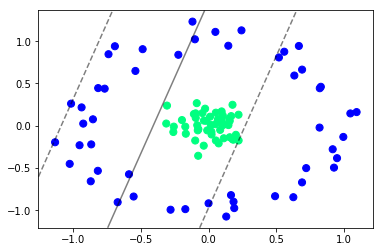

In [13]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = 'winter')
plt_svc(SVC(kernel = 'linear').fit(X,Y), plot_support = False)

In [14]:

r = np.exp(-(X**2).sum(1))

In [15]:
r


array([0.46186252, 0.95939433, 0.46987252, 0.98889776, 0.33952093,
       0.96261582, 0.32579386, 0.97856095, 0.33040558, 0.95207968,
       0.982553  , 0.99024656, 0.28083142, 0.43113322, 0.96734877,
       0.98897173, 0.25545032, 0.38138204, 0.92394046, 0.99294834,
       0.34987003, 0.39870926, 0.49624416, 0.42077716, 0.40570267,
       0.97263975, 0.26519788, 0.96049664, 0.9893214 , 0.98476721,
       0.96981395, 0.34454329, 0.9996441 , 0.39577693, 0.97067488,
       0.2639153 , 0.97357729, 0.5092315 , 0.94392316, 0.93579997,
       0.96598792, 0.93599158, 0.41734561, 0.39978187, 0.31026015,
       0.99511865, 0.36698583, 0.29362035, 0.94092071, 0.9906156 ,
       0.9291836 , 0.97571458, 0.44840401, 0.47822894, 0.33077874,
       0.92332907, 0.9112941 , 0.29075389, 0.99715598, 0.34792075,
       0.94903304, 0.45693832, 0.99617868, 0.99452987, 0.99694452,
       0.21628375, 0.43082962, 0.42307764, 0.28401585, 0.36485341,
       0.96955552, 0.97434791, 0.94469538, 0.38472458, 0.95984

In [16]:
from mpl_toolkits import mplot3d

In [32]:
def plot_3D(elev = 30,azim = 30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0],X[:,1],r, c = Y, s = 50, cmap = 'winter')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x[0]')
    ax.set_ylabel('y[1]')
    ax.set_zlabel('r')

In [22]:
from ipywidgets import interact, fixed

In [34]:
interact(plot_3D, elev = [-90,-60,-30,0,30,60,90], azim = [-180, 180], X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 7.22130809e-01, -5.01014066e-01],
       [-2.56657829e-02,  2.01976162e-01],
       [ 6.34424111e-01,  5.93969618e-01],
       [ 2.20041729e-02, -1.03344786e-01],
       [ 5.59960719e-01,  8.75593331e-01],
       [ 9.65885468e-02,  1.69621763e-01],
       [ 1.04893068e+00,  1.45721874e-01],
       [ 1.47000802e-01,  7.93515079e-03],
       [ 6.27196528e-01, -8.45020036e-01],
       [ 7.46445303e-02, -2.08649823e-01],
       [-9.48736314e-02,  9.27360962e-02],
       [ 8.58258887e-02, -4.93480762e-02],
       [-6.72540700e-01, -9.04261977e-01],
       [ 1.84676851e-01, -8.98461241e-01],
       [ 5.39594558e-02, -1.74024577e-01],
       [ 1.05134374e-01,  6.02473410e-03],
       [-6.93054149e-01,  9.40427174e-01],
       [-9.54399751e-01, -2.30379686e-01],
       [-8.73565332e-02,  2.67350870e-01],
       [-8.38611710e-02,  6.62888644e-03],
       [ 9.50411506e-01, -3.83290350e-01],
       [ 6.91843749e-01,  6.63984207e-01],
       